In [53]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [54]:
loan = pd.read_csv("Bank_Personal_Loan_Modelling.csv")  
loan.shape

(5000, 14)

In [55]:
loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#lets look at the datatype and see if we have the correct dtypes for each variable
## Attribute Information:

#ID: CustomerIDNote: I think I can remove this as it is just an identifucation 

#Age: Customer's age in completedyears

#Experience: #years of professionalexperience

#Income: Annual income of the customer($000)

#ZIP Code: Home Address ZIPcode.

#Family: Family size of thecustomer

#CCAvg: Avg. spending on credit cards per month($000)

#Education: Education Level. 1: Undergrad; 2: Graduate;3:Advanced/Professional
#Note:this is a catergorical variable, it has to be converted to a category type and 
##I have to creat dummies

#Mortgage: Value of house mortgage ifany.($000)

#PersonalLoan:Didthiscustomeracceptthepersonalloanofferedin the lastcampaign?
#Note: this is the target classification (Y)

#SecuritiesAccount:Doesthecustomerhaveasecuritiesaccountwith thebank?
#Note: this is also should be a catergorical variable

#CDAccount:Doesthecustomerhaveacertificateofdeposit (CD) account with thebank?
#Note: this also should be a categoricalvariable

#Online: Does the customer use internet bankingfacilities?
#Note: this also should be a catergoricalvariable

#Creditcard:Doesthecustomeruseacreditcardissuedbythe bank?#
#Note: this also should be a catergricalvariable

## Dealing with data types and identifying the uniques##

In [56]:
loan.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [57]:
#print(loan['CD Account'].unique())
loan.columns
for col in loan.columns:
    print(col,': number of unique entries = ',loan[col].nunique())
    #print(loan[col].unique())
    #print(loan[col].nunique())

ID : number of unique entries =  5000
Age : number of unique entries =  45
Experience : number of unique entries =  47
Income : number of unique entries =  162
ZIP Code : number of unique entries =  467
Family : number of unique entries =  4
CCAvg : number of unique entries =  108
Education : number of unique entries =  3
Mortgage : number of unique entries =  347
Personal Loan : number of unique entries =  2
Securities Account : number of unique entries =  2
CD Account : number of unique entries =  2
Online : number of unique entries =  2
CreditCard : number of unique entries =  2


In [58]:
#I thought it might be usefull to convert but looks like Np###
##I will see##
#print(loan['Education'] )
#convert categorical variables to strings or object datatype
##convert Education from int to string
#loan['Education'] = loan['Education'].astype('str')
##for the remainig cloumns convert them to strings
#get the list of the names of the cols we want to convert
#cat_var_titles = loan.columns[8:13]
#print(cat_var_titles)
#for c in cat_var_titles:
    #print(c)
    #convert each of these cols to string type
    #loan[c]=loan[c].astype('str')

## droping un nessassry cols##

In [59]:
#the Id is not nessassry lets drop it
loan = loan.drop(["ID","ZIP Code"], axis=1)
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [60]:
loan.shape

(5000, 12)

## Missing values or none sense values##

In [61]:
loan.isnull().sum()##do we have NaNs

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Note that:     no nulls in all variables     
Lets check the detailed description to see if we have non sense values

In [62]:
loan.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


the min in Experience is -3 this is nonsense

In [63]:
loan[loan<0.0].count()

Age                    0
Experience            52
Income                 0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [64]:
#give me all rows that has <0.0 (negative number) experience value
loan[loan['Experience']<0.0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0
536,25,-1,43,3,2.40,2,176,0,0,0,1,0
540,25,-1,109,4,2.30,3,314,0,0,0,1,0
576,25,-1,48,3,0.30,3,0,0,0,0,0,1
583,24,-1,38,2,1.70,2,0,0,0,0,1,0
597,24,-2,125,2,7.20,1,0,0,1,0,0,1


In [65]:
#get the median of all variables
loan.median()

Age                   45.0
Experience            20.0
Income                64.0
Family                 2.0
CCAvg                  1.5
Education              2.0
Mortgage               0.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
Online                 1.0
CreditCard             0.0
dtype: float64

In [66]:
#loan.mean()df['a'] = df['a'].apply(lambda x: x + 1)
#cData = cData.replace('?', np.nan)
#loan['Experience']=loan['Experience'].replace('< 0.0',np.nan)
#print(loan['Experience']==np.nan)
#loan[loan['Experience']== np.nan]
#print(loan['Experience'][89])
#Data.loc[2,'Number'] = 1234  # replace a value at a specific location
#loanI=loan[loan['Experience']<0.0]=20
#loan.loc[loan.Experience < 0.0, 'Experience'] = 20
#print(loan['Experience'][89])
#print(loan.Experience.median())

In [67]:
#replace all negative values in the col Experince with the median
Exp_median = loan.Experience.median()
loan.loc[loan.Experience < 0.0, 'Experience'] = Exp_median 
#look at the description again# 
#the Experience min should have changed#
loan.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Dealing with categroical variable##

In [68]:
#cData['origin'] = cData['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
#get head
#get dummies
#get head

In [69]:
##Education: Education Level. 1: Undergrad; 2: Graduate;3:Advanced/Professional
loan['Education'] = loan['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/professional'})
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19.0,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15.0,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9.0,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8.0,45,4,1.0,Graduate,0,0,0,0,0,1


In [70]:
#loan = pd.get_dummies(loan, columns=['Education'])

In [71]:
#loan.dtypes

In [72]:
#loan.shape

In [73]:
#col=loan.columns
#loan[col].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2));

In [74]:
loan[loan['Personal Loan']==0.0].count()

Age                   4520
Experience            4520
Income                4520
Family                4520
CCAvg                 4520
Education             4520
Mortgage              4520
Personal Loan         4520
Securities Account    4520
CD Account            4520
Online                4520
CreditCard            4520
dtype: int64

In [75]:
cat_var_titles = loan.columns[7:12]
print(cat_var_titles)
for c in cat_var_titles:
    print(c)
    #convert each of these cols to string type
    loan[c]=loan[c].astype('str')

Index(['Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')
Personal Loan
Securities Account
CD Account
Online
CreditCard


In [76]:
loan.dtypes

Age                     int64
Experience            float64
Income                  int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal Loan          object
Securities Account     object
CD Account             object
Online                 object
CreditCard             object
dtype: object

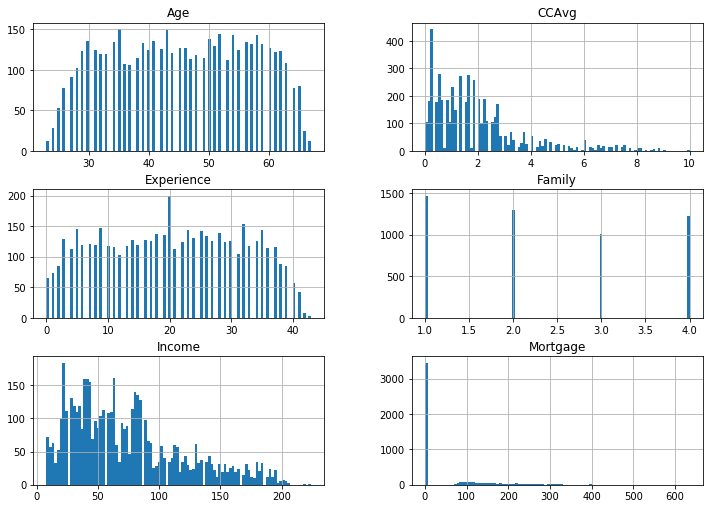

In [77]:
col=loan.columns
loan[col].hist(stacked=False, bins=100, figsize=(12,30), layout=(10,2));

From theses histograms we can see that:
The age of the targeted customers is mostly between 30 and 60
The experience is from all the spectrum kind of equally distributed, however people with 20 years experience are the most in the sample
Their income is modtly below 100 Kdolars
Most of them spend less than 2000 dolars per month on credit card
The number of family members is comparable, however targeted customers with 1 family member has been the most in the sample
A huge number of these trageted customers have zero mortage
The numbers are below

In [78]:
print('number of people with 0 mortgage')
loan[loan['Mortgage']==0.0].count()

number of people with 0 mortgage


Age                   3462
Experience            3462
Income                3462
Family                3462
CCAvg                 3462
Education             3462
Mortgage              3462
Personal Loan         3462
Securities Account    3462
CD Account            3462
Online                3462
CreditCard            3462
dtype: int64

In [79]:
print('number of people with 0 CCAvg')
loan[loan['CCAvg']==0.0].count()

number of people with 0 CCAvg


Age                   106
Experience            106
Income                106
Family                106
CCAvg                 106
Education             106
Mortgage              106
Personal Loan         106
Securities Account    106
CD Account            106
Online                106
CreditCard            106
dtype: int64

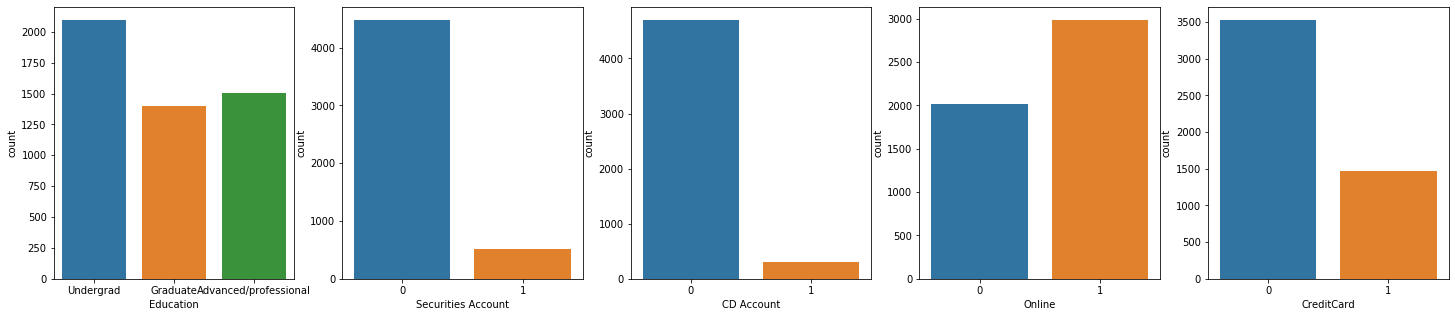

In [80]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 5, 1)
sns.countplot(loan['Education']) # after dummies this does not work do I deketed the dummies to get it
plt.subplot(1, 5, 2)
sns.countplot(loan['Securities Account'])
plt.subplot(1, 5, 3)
sns.countplot(loan['CD Account'])
plt.subplot(1, 5, 4)
sns.countplot(loan['Online'])
plt.subplot(1, 5, 5)
sns.countplot(loan['CreditCard'])
plt.show()

The sample of the trageted customers shows that the number of Graduate degree and Professional degree holders is comparable while the number of the undergarduate holders is the highest
More than 90% of them do not have securities account and CD acounts
The number of customers who use the online banking is higher
While the number of customers who do not have crditcard with the bank is higher

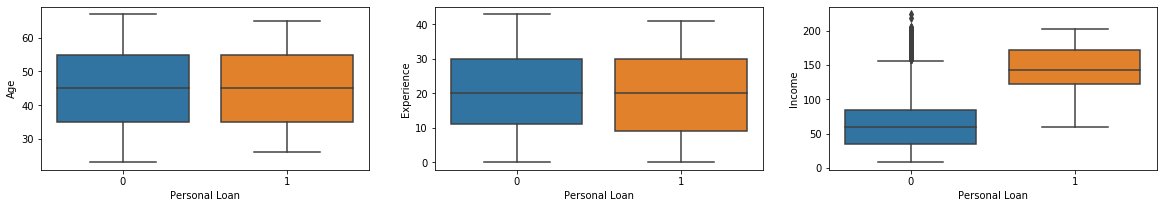

In [81]:
plt.figure(figsize=(20,3)) # Set figure size
plt.subplot(1, 3, 1)
sns.boxplot(loan["Personal Loan"],loan["Age"],data=loan) # Boxplot of Age
plt.subplot(1, 3, 2)
sns.boxplot(loan["Personal Loan"],loan["Experience"],data=loan) # Boxplot of Experience
plt.subplot(1, 3, 3)
sns.boxplot(loan["Personal Loan"],loan["Income"],data=loan) # Boxplot of Income

Here we try to make sense of how the change in one variable affect the respone:
The median of the age and the experience of the customers who responded to the loan is comparable to those who did not respond
However, It is bovious that the income meadian of the customers who responded to the loan is almost 50% higher than thoes who did not accept the loan
This means that the income variable is a key one

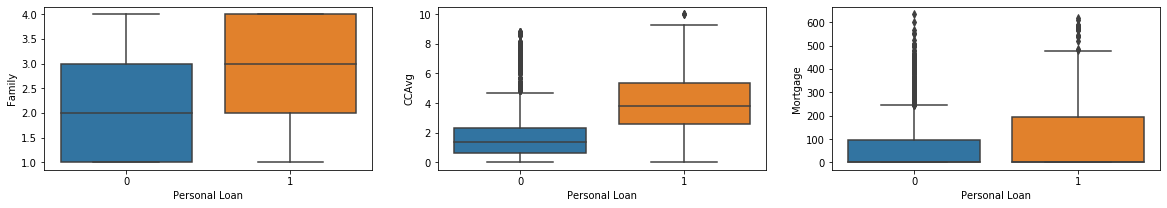

In [82]:
plt.figure(figsize=(20,3)) # Set figure size
plt.subplot(1, 3, 1)
sns.boxplot(loan["Personal Loan"],loan["Family"],data=loan) # Boxplot of Family
plt.subplot(1, 3, 2)
sns.boxplot(loan["Personal Loan"],loan["CCAvg"],data=loan) # Boxplot of CCAvg
plt.subplot(1, 3, 3)
sns.boxplot(loan["Personal Loan"],loan["Mortgage"],data=loan) # Boxplot of mortage

Itis worth noting that the customers who have a 3 family members as median responded to the loan while thoes with 2 members did not
The customers with a higher median spending on credit card per month have responded to the loan while thoes with median less than 2000 did not
However there are many outliers here. People spend more than 6000 per month in credit card yet did not respond to the loan
Also the median of the mortgage of the people who responded is lower than thoes who did not

In [30]:
#pd.crosstab(loan['Education'], loan['Personal Loan']).plot(kind='bar', stacked=True)
#pd.crosstab(loan['Securities Account'], loan['Personal Loan']).plot(kind='bar', stacked=True)
#pd.crosstab(loan['CD Account'], loan['Personal Loan']).plot(kind='bar', stacked=True)
#pd.crosstab(loan['Online'], loan['Personal Loan']).plot(kind='bar', stacked=True)

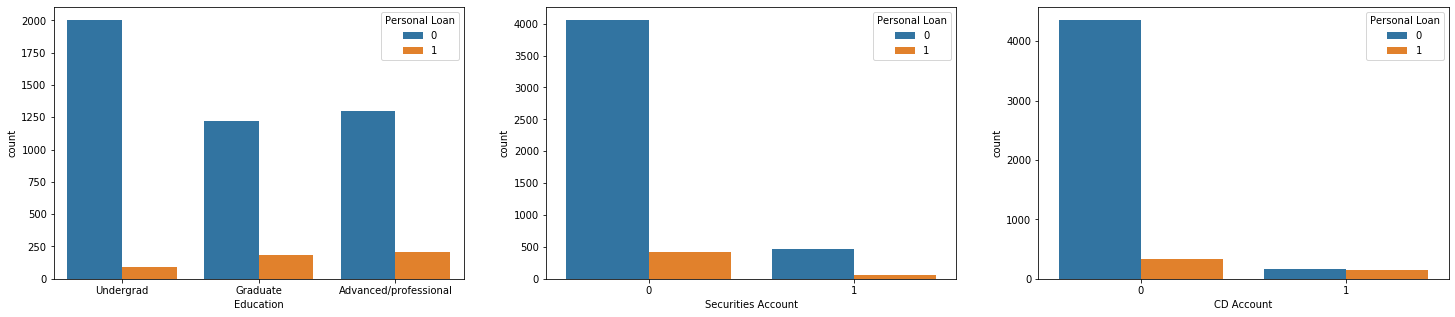

In [83]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 3, 1)
sns.countplot(loan['Education'],hue=loan['Personal Loan']) # after dummies this does not work do I deketed the dummies to get it
plt.subplot(1, 3, 2)
sns.countplot(loan['Securities Account'],hue=loan['Personal Loan'])
plt.subplot(1, 3, 3)
sns.countplot(loan['CD Account'],hue=loan['Personal Loan'])
plt.show()

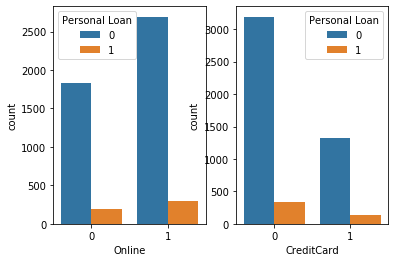

In [84]:
plt.subplot(1, 2, 1)
sns.countplot(loan['Online'],hue=loan['Personal Loan'])
plt.subplot(1, 2, 2)
sns.countplot(loan['CreditCard'],hue=loan['Personal Loan'])
plt.show()

We look here at the above five plots:
The hue in each case represnts the respone variable
For education we can see that customers with advanced degrees responded more to the loan then comes the graduate degree holders
People with security account and CD account responded more to the loan, than thoes who do not have a security account with the bank
Also customers who use online banking responded more than thoes who do not use the online service
Finally customers with no credit card with the bank responded postively to the loan as compared to thoes who do not have the bank credit card
Looks like all these catergorical variables do affect the response


In [85]:
loan.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,4,1.6,Undergrad,0,0,1,0,0,0
1,45,19.0,34,3,1.5,Undergrad,0,0,1,0,0,0
2,39,15.0,11,1,1.0,Undergrad,0,0,0,0,0,0
3,35,9.0,100,1,2.7,Graduate,0,0,0,0,0,0
4,35,8.0,45,4,1.0,Graduate,0,0,0,0,0,1


In [87]:
cat_var_titles2 = loan.columns[7:12]
print(cat_var_titles2)
for c in cat_var_titles2:
    print(c)
    #convert each of these cols to string type
    loan[c]=loan[c].astype('int')

Index(['Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')
Personal Loan
Securities Account
CD Account
Online
CreditCard


In [88]:
loan.dtypes

Age                     int64
Experience            float64
Income                  int64
Family                  int64
CCAvg                 float64
Education              object
Mortgage                int64
Personal Loan           int32
Securities Account      int32
CD Account              int32
Online                  int32
CreditCard              int32
dtype: object

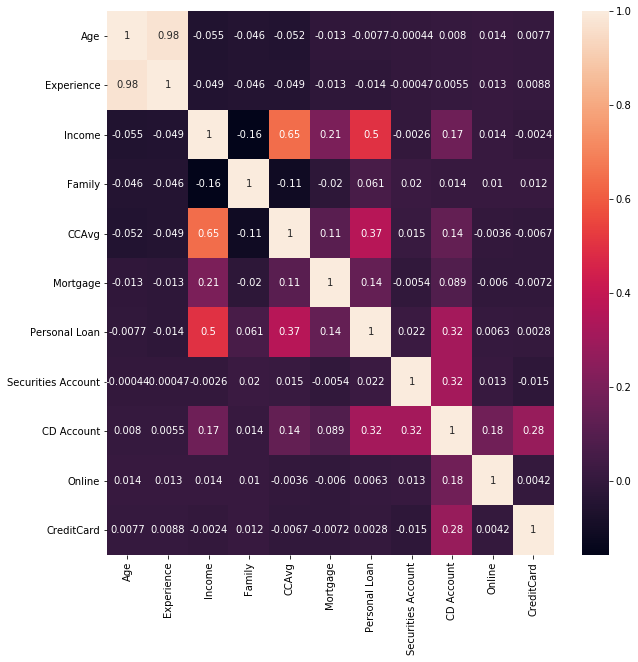

In [92]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
#sns.heatmap(loan.corr(), annot = True)
sns.heatmap(loan.corr(), annot = True, ax=ax)

from the above heatmap:
The correlation between the Age and Experience is high 0.98 (we should drop one of them)
Looking at the plot of Age and Experience vs the personal loan, I think it is ok to drop any on them I can see Why I should have prefrences here.

Also,The correlation between the Income and the CCAvg is high 0.65 (It is better to drop one of them)
the perecntage of the change in the income median vs personal loan is slightly higher than that in the CCAvg
I will drop CCAvg
Also correlation between Income and personal loan is higher than that between CCAvg and personal loan it makes sense to drop the CCAvg

In [93]:
loan = pd.get_dummies(loan, columns=['Education'])

In [94]:
loan.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_Advanced/professional,Education_Graduate,Education_Undergrad
0,25,1.0,49,4,1.6,0,0,1,0,0,0,0,0,1
1,45,19.0,34,3,1.5,0,0,1,0,0,0,0,0,1
2,39,15.0,11,1,1.0,0,0,0,0,0,0,0,0,1
3,35,9.0,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8.0,45,4,1.0,0,0,0,0,0,1,0,1,0


In [95]:
loan.shape

(5000, 14)

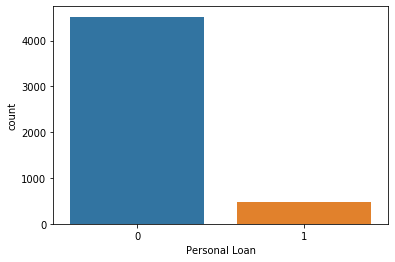

In [96]:
sns.countplot(loan['Personal Loan'])

In [97]:
loan[loan['Personal Loan']==0.0].count()

Age                                4520
Experience                         4520
Income                             4520
Family                             4520
CCAvg                              4520
Mortgage                           4520
Personal Loan                      4520
Securities Account                 4520
CD Account                         4520
Online                             4520
CreditCard                         4520
Education_Advanced/professional    4520
Education_Graduate                 4520
Education_Undergrad                4520
dtype: int64

In [98]:
#loan = loan.drop(["Age","CCAvg"], axis=1)
X = loan.drop(['Age','Education_Undergrad','CCAvg','Personal Loan'], axis=1)
# the dependent variable
y = loan[['Personal Loan']]

In [99]:
X.head()

,Experience,Income,Family,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Advanced/professional,Education_Graduate
0,1.0,49,4,0,1,0,0,0,0,0
1,19.0,34,3,0,1,0,0,0,0,0
2,15.0,11,1,0,0,0,0,0,0,0
3,9.0,100,1,0,0,0,0,0,0,1
4,8.0,45,4,0,0,0,0,1,0,1


In [100]:
X.shape

(5000, 10)

In [101]:
y.shape

(5000, 1)

In [111]:
print(y[y['Personal Loan']==0.0].count())
print(len(y['Personal Loan']))
print((y[y['Personal Loan']==0.0].count()/len(y['Personal Loan']))*100)

Personal Loan    4520
dtype: int64
5000
Personal Loan    90.4
dtype: float64


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

check that the splitting 70 to 30 has resulted in comprable percentages splitting of the response Personal loan in train and test data

In [117]:
print(y_train[y_train['Personal Loan']==0.0].count())
print(len(y_train['Personal Loan']))
print((y_train[y_train['Personal Loan']==0.0].count()/len(y_train['Personal Loan']))*100)

Personal Loan    3169
dtype: int64
3500
Personal Loan    90.542857
dtype: float64


In [118]:
print(y_test[y_test['Personal Loan']==0.0].count())
print(len(y_test['Personal Loan']))
print((y_test[y_test['Personal Loan']==0.0].count()/len(y_test['Personal Loan']))*100)

Personal Loan    1351
dtype: int64
1500
Personal Loan    90.066667
dtype: float64


In [136]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on training data
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on testing data
y_predict = model.predict(X_test)

coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

C:\Users\hassa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


          0         1         2        3         4         5         6  \
0 -0.012353  0.047494  0.398033  0.00046 -0.856418  3.083374 -0.607298   

          7         8         9  intercept  
0 -0.907937  2.656322  2.568067  -9.286683  


In [137]:
model_score = model.score(X_test, y_test)
print('Testing accuracy',model_score)

Testing accuracy 0.9506666666666667


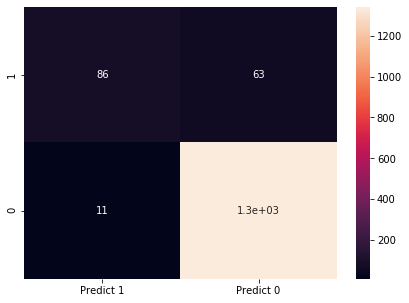

In [138]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

True Positives (TP)= 86, the model predicts they accepted the loan and in reality they did
True Negatives (TN)= 1300, the model predicta they rejected the laon and in reality they did
False Positives(FP) = 11, the model predicts they accepted the loan but in reality they did not
False Negatives (FN) = 63 the model predicts they did not accept the loan but in reality they did

In [139]:
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Trainig accuracy 0.9554285714285714

Testing accuracy 0.9506666666666667

Recall: 0.5771812080536913

Precision: 0.8865979381443299

F1 Score: 0.6991869918699188

Roc Auc Score: 0.784519545551642


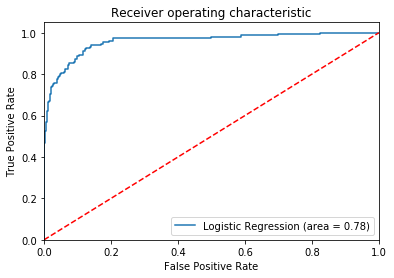

In [140]:
#Area under the curve (AUC) and ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

I think the error in FP False positives can be more expensive for future personal loans than the error in False negatives
Because the bank would have made very unaccurate develoment plans based on a no accurate number of prospective customers in the future. Also if this FP ended up a high number that means the bank will be misguided when it comes to put attractive factors for customers or at least the current attraction plan is not going to work well

In [145]:
# Checking Parameters of logistic regression
model.get_params()

{'C': 0.75,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

I think this says the the optimized solver might be saga
Also it says penalty is l2, this can be improved maybe with setting penalty to be l1
Also, we can try the calss weight = balanced
We could also try lower C values as it is =1.0 now

In [149]:
##here try different solvers and check the score in general
train_score=[]
test_score=[]

solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print('train score',train_score)
print()
print('test score',test_score)

C:\Users\hassa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hassa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hassa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

train score [0.96, 0.956, 0.954, 0.895, 0.895]

test score [0.957, 0.951, 0.948, 0.892, 0.891]


C:\Users\hassa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\hassa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hassa\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


##business insights##
*True Positives (TP)= 86, the model predicts they accepted the loan and in reality they did *
##################
True Negatives (TN)= 1300, the model predicta they rejected the laon and in reality they did 
#################False Positives(FP) = 11, the model predicts they accepted the loan but in reality they did not False #################Negatives (FN) = 63 the model predicts they did not accept the loan but in reality they did
################I think the error in FP False positives can be more expensive for future personal loans than the error in False negatives 
################Because the bank would have made very unaccurate develoment plans based on a no accurate number of prospective customers in the future. 
##################Also if this FP ended up a high number that means the bank will be misguided when it comes to put attractive factors for customers or at least the current attraction plan is not going to work well